## Imports

1 Business Understanding
2 Data understanding
3 Prepare data
4 Model data
5 Results

In [116]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import StandardScaler

In [74]:
# load data
data = pd.read_csv('/Users/bethbarlow/Documents/Nanodegree/udacity_ds_nanodegree_capstone/data/corporate_rating.csv')

In [75]:
data.head()

,Rating,Name,Symbol,Rating Agency Name,Date,Sector,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,...,effectiveTaxRate,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover
0,A,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,11/27/2015,Consumer Durables,0.945894,0.426395,0.099690,44.203245,...,0.202716,0.437551,6.810673,9.809403,4.008012,0.049351,7.057088,15.565438,0.058638,3.906655
1,BBB,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,2/13/2014,Consumer Durables,1.033559,0.498234,0.203120,38.991156,...,0.074155,0.541997,8.625473,17.402270,3.156783,0.048857,6.460618,15.914250,0.067239,4.002846
2,BBB,Whirlpool Corporation,WHR,Fitch Ratings,3/6/2015,Consumer Durables,0.963703,0.451505,0.122099,50.841385,...,0.214529,0.513185,9.693487,13.103448,4.094575,0.044334,10.491970,18.888889,0.074426,3.483510
3,BBB,Whirlpool Corporation,WHR,Fitch Ratings,6/15/2012,Consumer Durables,1.019851,0.510402,0.176116,41.161738,...,1.816667,-0.147170,-1.015625,14.440104,3.630950,-0.012858,4.080741,6.901042,0.028394,4.581150
4,BBB,Whirlpool Corporation,WHR,Standard & Poor's Ratings Services,10/24/2016,Consumer Durables,0.957844,0.495432,0.141608,47.761126,...,0.166966,0.451372,7.135348,14.257556,4.012780,0.053770,8.293505,15.808147,0.058065,3.857790


In [76]:
# check distributions of numerical variables
data.describe()

,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,netProfitMargin,pretaxProfitMargin,grossProfitMargin,operatingProfitMargin,returnOnAssets,returnOnCapitalEmployed,...,effectiveTaxRate,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover
count,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,...,2029.000000,2029.000000,2.029000e+03,2.029000e+03,2029.000000,2029.000000,2029.000000,2.029000e+03,2029.000000,2029.000000
mean,3.529607,2.653986,0.667364,333.795606,0.278447,0.431483,0.497968,0.587322,-37.517928,-73.974193,...,0.397572,0.409550,5.094719e+03,4.227549e+03,3.323579,0.437454,48.287985,6.515123e+03,1.447653,38.002718
std,44.052361,32.944817,3.583943,4447.839583,6.064134,8.984982,0.525307,11.224622,1166.172220,2350.275719,...,10.595075,3.796488,1.469156e+05,1.224000e+05,87.529866,8.984299,529.118961,1.775290e+05,19.483294,758.923588
min,-0.932005,-1.893266,-0.192736,-811.845623,-101.845815,-124.343612,-14.800817,-124.343612,-40213.178290,-87162.162160,...,-100.611015,-120.916010,-4.912742e+03,-1.915035e+01,-2555.419643,-124.343612,-3749.921337,-1.195049e+04,-4.461837,-76.662850
25%,1.071930,0.602825,0.130630,22.905093,0.021006,0.025649,0.233127,0.044610,0.019176,0.028112,...,0.146854,0.271478,4.119924e-01,1.566038e+00,2.046822,0.028057,6.238066,2.356735e+00,0.073886,2.205912
50%,1.493338,0.985679,0.297493,42.374120,0.064753,0.084965,0.414774,0.107895,0.045608,0.074421,...,0.300539,0.644529,2.131742e+00,3.686513e+00,2.652456,0.087322,9.274398,4.352584e+00,0.133050,5.759722
75%,2.166891,1.453820,0.624906,59.323563,0.114807,0.144763,0.849693,0.176181,0.077468,0.135036,...,0.370653,0.836949,4.230253e+00,8.086152e+00,3.658331,0.149355,12.911759,7.319759e+00,0.240894,9.480892
max,1725.505005,1139.541703,125.917417,115961.637400,198.517873,309.694856,2.702533,410.182214,0.487826,2.439504,...,429.926282,34.594086,5.753380e+06,4.786803e+06,2562.871795,309.694856,11153.607090,6.439270e+06,688.526591,20314.880400


In [77]:
data.describe()
data.columns
data.shape
data.dtypes

Rating                                 object
Name                                   object
Symbol                                 object
Rating Agency Name                     object
Date                                   object
Sector                                 object
currentRatio                          float64
quickRatio                            float64
cashRatio                             float64
daysOfSalesOutstanding                float64
netProfitMargin                       float64
pretaxProfitMargin                    float64
grossProfitMargin                     float64
operatingProfitMargin                 float64
returnOnAssets                        float64
returnOnCapitalEmployed               float64
returnOnEquity                        float64
assetTurnover                         float64
fixedAssetTurnover                    float64
debtEquityRatio                       float64
debtRatio                             float64
effectiveTaxRate                  

In [78]:
missing = data.isna().sum()/len(data) # no missing data

In [79]:
#Change date to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Extract day, month and year from date
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

#Remove 'Date' and 'Symbol' column
data.drop(columns = ['Date', 'Symbol'], inplace = True)

In [80]:
# check classes and balance of data
data.Rating.value_counts()

# Reclassify 'Rating' column due to few data points for some categories
data['Rating'] = data['Rating'].replace({'AA':'AAA/AA', 'AAA':'AAA/AA', 'CCC': 'CCC and below', 'CC': 'CCC and below', 'C':'CCC and below', 'D':'CCC and below'})
data.Rating.value_counts()

BBB              671
BB               490
A                398
B                302
AAA/AA            96
CCC and below     72
Name: Rating, dtype: int64

In [81]:
data['Rating Agency Name'].value_counts()

Standard & Poor's Ratings Services    744
Egan-Jones Ratings Company            603
Moody's Investors Service             579
Fitch Ratings                         100
DBRS                                    3
Name: Rating Agency Name, dtype: int64

In [82]:
numerical_cols = data.select_dtypes(include=['float64']).columns.tolist()

In [ ]:
# plot distributions of all variables
numerical_cols = data.select_dtypes(include=['float64']).columns.tolist()
for col in numerical_cols:
    plt.figure()
    plt.boxplot(data[col])

In [108]:
# outliers appear to be a problem. Use the Tukey rule to determine IQR and find percentage of observations outwith IQR for each variable:

def tukey_rule(dataframe, column_name_list):
    
    '''
    Detects outliers using the Tukey rule and removes entire row from dataframe
    
    Inputs: 
    dataframe - dataframe
    column_name_list - list of columns to be assessed for outliers
    
    Outputs:
    data_winz - dataframe with outlier rows removed
    
    '''
    
    data_winz = dataframe.copy()
    perc_outliers = []
    
    for col in column_name_list:

        Q1 = dataframe[col].quantile(0.25)
        Q3 = dataframe[col].quantile(0.75)

        IQR = Q3-Q1

        max_value = Q3 + 1.5 * IQR
        min_value = Q1 - 1.5 * IQR
        
        # Calculate percentage of each column that is outwith max and min Tukey values
        perc_outliers.append(100 * len(dataframe[(dataframe[col] > max_value) | (dataframe[col] < min_value)][col])/len(dataframe[col]))
        
        # Winzorize columns based on using Tukey fences to remove outliers for data exploration
        data_winz[col] = data_winz[col].clip(min_value, max_value)
    
    return data_winz, perc_outliers


In [112]:
data_winz, perc_outliers = tukey_rule(data, numerical_cols)

In [113]:
outlier_comparison = pd.DataFrame()
outlier_comparison['col'] = numerical_cols
outlier_comparison['mean_outliers'] = data[numerical_cols].mean().values
outlier_comparison['mean_data_winz'] = data_winz[numerical_cols].mean().values

outlier_comparison['perc_outliers'] = perc_outliers
outlier_comparison.sort_values('perc_outliers', ascending = False) # no impact on mean values by winzorzing data

,col,mean_outliers,mean_data_winz,perc_outliers
10,returnOnEquity,143.494296,0.125372,15.524889
13,debtEquityRatio,2.328306,1.958219,13.947758
19,companyEquityMultiplier,3.323579,2.962596,13.652045
15,effectiveTaxRate,0.397572,0.259872,12.025628
5,pretaxProfitMargin,0.431483,0.089040,11.631345
4,netProfitMargin,0.278447,0.069567,11.434204
20,ebitPerRevenue,0.437454,0.092958,11.089207
21,enterpriseValueMultiple,48.287985,9.866521,11.039921
18,cashPerShare,4227.548561,5.674842,10.103499
17,freeCashFlowPerShare,5094.718642,2.538900,9.955643


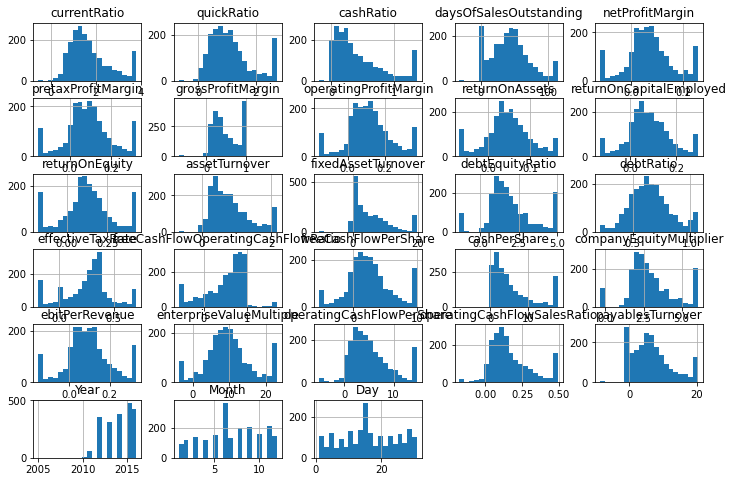

In [118]:
# result - use data_winz for analysing relationships 

#distributions of the variables
data_winz.hist(figsize=(12,8),bins=20)
plt.show()

In [119]:
data_winz

,Rating,Name,Rating Agency Name,Sector,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,netProfitMargin,pretaxProfitMargin,...,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover,Year,Month,Day
0,A,Whirlpool Corporation,Egan-Jones Ratings Company,Consumer Durables,0.945894,0.426395,0.099690,44.203245,0.037480,0.049351,...,9.809403,4.008012,0.049351,7.057088,14.764294,0.058638,3.906655,2015,11,27
1,BBB,Whirlpool Corporation,Egan-Jones Ratings Company,Consumer Durables,1.033559,0.498234,0.203120,38.991156,0.044062,0.048857,...,17.402270,3.156783,0.048857,6.460618,14.764294,0.067239,4.002846,2014,2,13
2,BBB,Whirlpool Corporation,Fitch Ratings,Consumer Durables,0.963703,0.451505,0.122099,50.841385,0.032709,0.044334,...,13.103448,4.094575,0.044334,10.491970,14.764294,0.074426,3.483510,2015,3,6
3,BBB,Whirlpool Corporation,Fitch Ratings,Consumer Durables,1.019851,0.510402,0.176116,41.161738,0.020894,-0.012858,...,14.440104,3.630950,-0.012858,4.080741,6.901042,0.028394,4.581150,2012,6,15
4,BBB,Whirlpool Corporation,Standard & Poor's Ratings Services,Consumer Durables,0.957844,0.495432,0.141608,47.761126,0.042861,0.053770,...,14.257556,4.012780,0.053770,8.293505,14.764294,0.058065,3.857790,2016,10,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024,BBB,"NVR, Inc.",Moody's Investors Service,Capital Goods,3.809332,2.730312,1.366320,1.079762,0.056706,0.086376,...,17.866324,1.759461,0.086376,15.867701,14.764294,0.083018,15.758348,2012,9,5
2025,BB,Kaiser Aluminum Corporation,Standard & Poor's Ratings Services,Capital Goods,2.962788,1.294743,0.428234,30.602414,-0.119695,-0.153023,...,5.958956,1.614282,-0.153890,-3.772474,9.232021,0.114089,14.542373,2016,4,28
2026,B,Cresud S.A.C.I.F. y A.,Fitch Ratings,Finance,0.883875,0.842553,0.233830,113.951268,-0.007458,0.000219,...,1.056480,4.034952,0.265092,9.358311,1.575328,0.283634,2.300168,2012,11,30
2027,B,Cresud S.A.C.I.F. y A.,Fitch Ratings,Finance,0.911713,0.748356,0.310640,113.951268,0.087365,0.130692,...,1.470201,3.825856,0.130692,22.440102,1.074441,0.217783,1.997608,2012,6,15


In [ ]:
fig, ax = plt.subplots(figsize = (15, 5))
sns.countplot(x = data_winz['Name'].values, data=data_winz)
ax.set_title("Number of Credit Ratings Per Company")
plt.show()

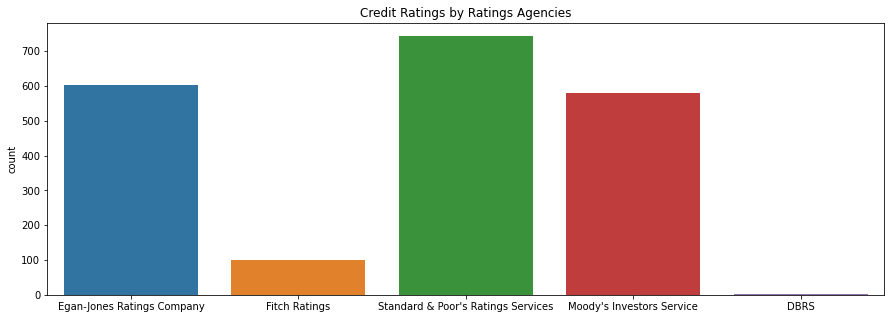

In [129]:
fig, ax = plt.subplots(figsize = (15, 5))
sns.countplot(x = data_winz['Rating Agency Name'].values, data=data_winz)
ax.set_title("Number of Credit Ratings per Ratings Agency")
plt.show()

# result - remove DBRS from dataset

KeyboardInterrupt: 

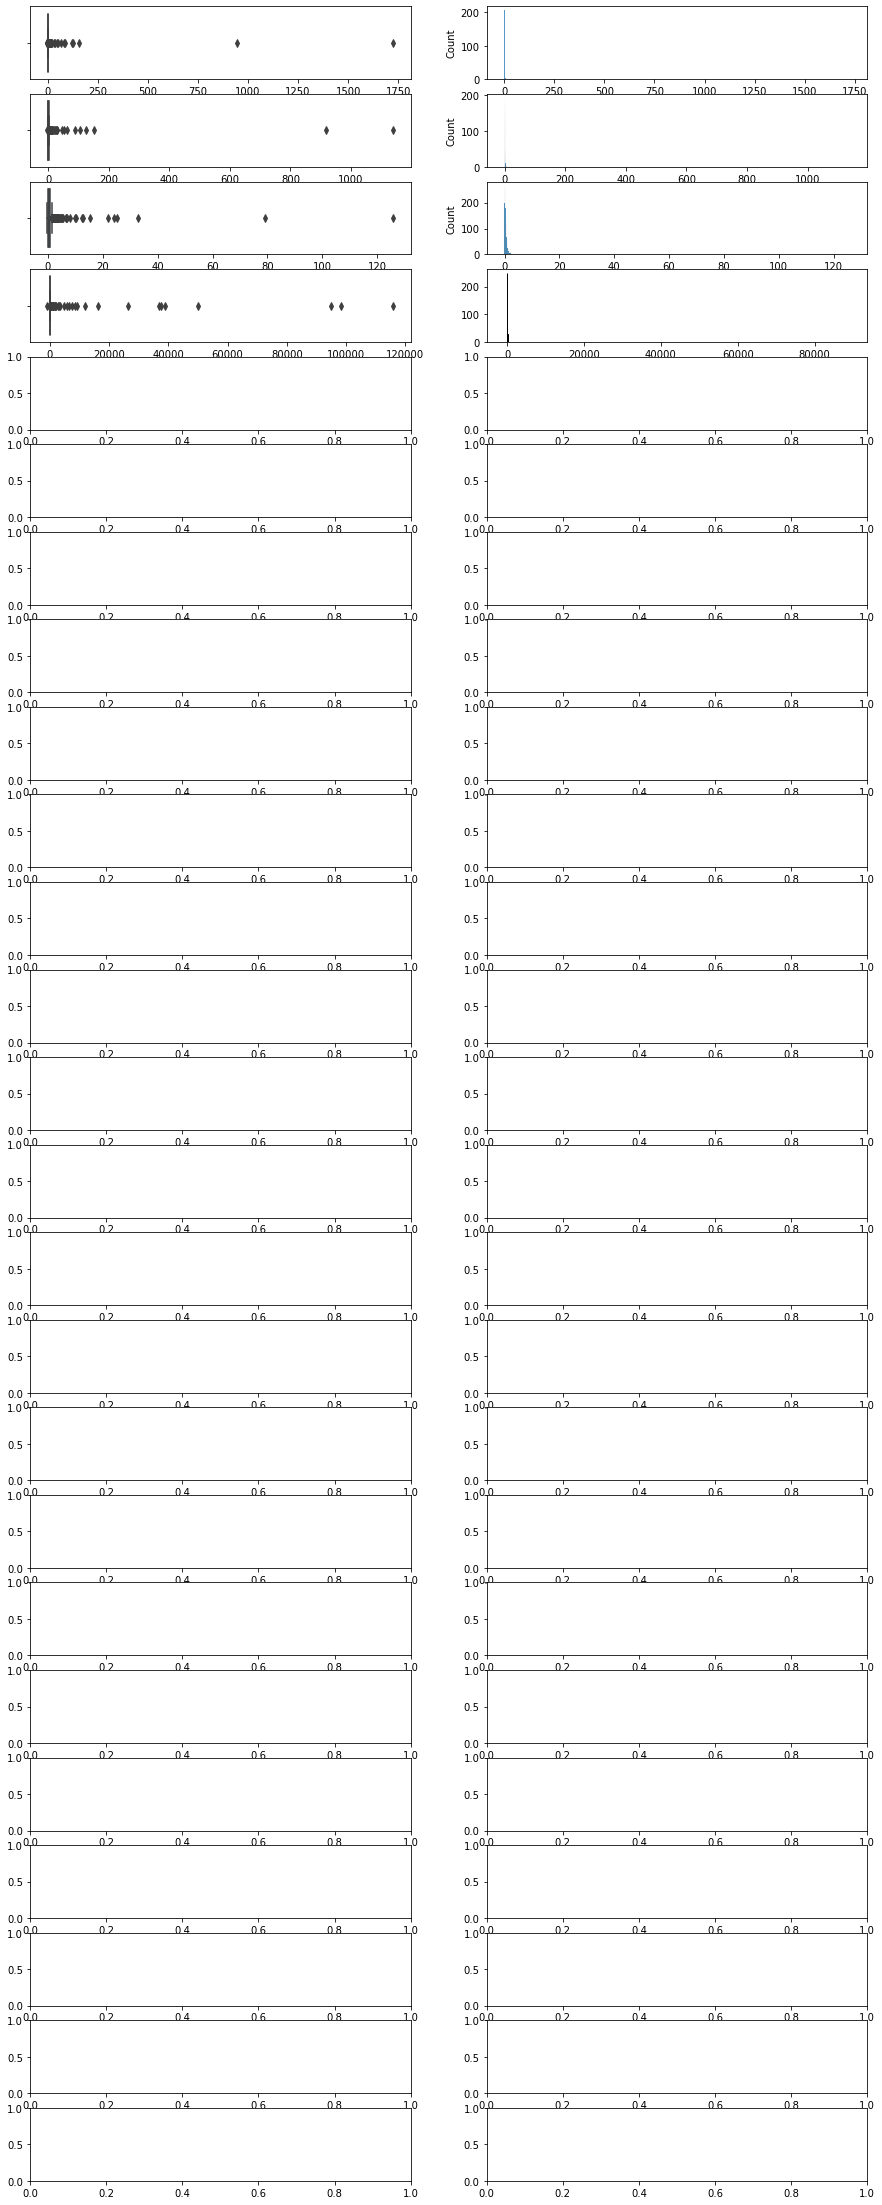

In [158]:
fig, ax = plt.subplots(25, 2, figsize = (15, 40))

count = 0
for col in data[numerical_cols].columns:
    
    sns.boxplot(x= data[col], ax = ax[count,0])
    sns.histplot(data[col], ax = ax[count,1])
    count += 1

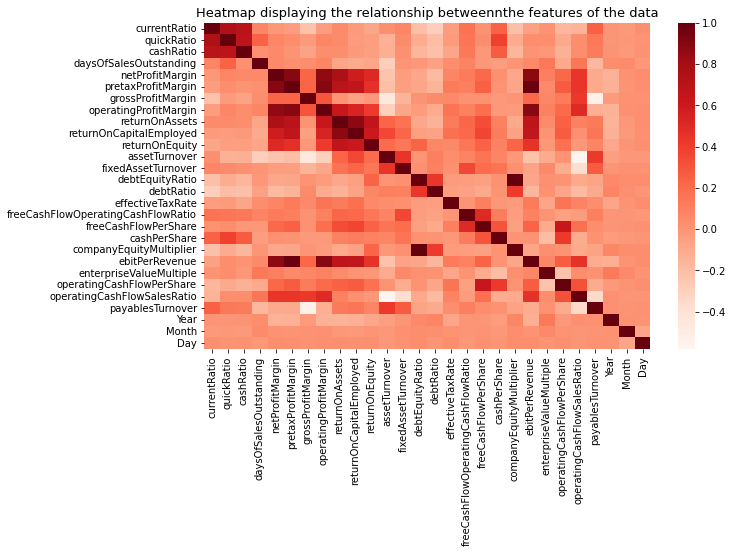

In [156]:
#correlation between the variables
corr_matrix = data_winz.corr()
plt.figure(figsize=(10,6))
sns.heatmap(data_winz.corr(),cmap=plt.cm.Reds,annot=False)
plt.title('Heatmap displaying the relationship betweennthe features of the data',
         fontsize=13)
plt.show()

In [157]:
corr_matrix

,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,netProfitMargin,pretaxProfitMargin,grossProfitMargin,operatingProfitMargin,returnOnAssets,returnOnCapitalEmployed,...,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover,Year,Month,Day
currentRatio,1.000000,0.747652,0.699601,0.075773,-0.010186,-0.043242,-0.221289,-0.043238,0.044253,-0.030332,...,0.245730,-0.206957,-0.056666,0.010296,-0.164893,-0.145753,0.251647,-0.002784,-0.024350,0.024573
quickRatio,0.747652,1.000000,0.681672,0.241288,0.071551,0.039425,-0.030725,0.071481,0.044771,-0.032438,...,0.387980,-0.111552,0.033332,0.035423,-0.105465,0.039246,0.135603,-0.003801,-0.009175,0.002424
cashRatio,0.699601,0.681672,1.000000,0.020715,0.048973,0.008409,-0.065421,0.034538,0.042382,-0.019570,...,0.272837,-0.158859,0.006115,-0.006773,-0.134023,0.041061,0.118902,0.003919,-0.023029,0.014723
daysOfSalesOutstanding,0.075773,0.241288,0.020715,1.000000,0.051161,0.030116,0.032446,0.077270,-0.081762,-0.101676,...,-0.043765,-0.004538,0.060757,0.140437,-0.093894,0.150065,-0.170216,0.031375,0.044989,-0.008179
netProfitMargin,-0.010186,0.071551,0.048973,0.051161,1.000000,0.893918,0.232278,0.868781,0.755604,0.580332,...,0.020896,-0.091082,0.880681,0.102501,0.219360,0.439738,-0.101173,-0.138831,0.017173,0.033380
pretaxProfitMargin,-0.043242,0.039425,0.008409,0.030116,0.893918,1.000000,0.231249,0.896706,0.697295,0.663613,...,0.007283,-0.082766,0.984156,0.060604,0.267229,0.447404,-0.098828,-0.133604,0.004449,0.030222
grossProfitMargin,-0.221289,-0.030725,-0.065421,0.032446,0.232278,0.231249,1.000000,0.301839,0.003617,-0.051357,...,-0.024871,-0.000874,0.220854,0.066820,0.125120,0.424948,-0.542475,-0.025423,0.013418,0.016905
operatingProfitMargin,-0.043238,0.071481,0.034538,0.077270,0.868781,0.896706,0.301839,1.000000,0.617885,0.541386,...,-0.020609,-0.030673,0.899682,0.093524,0.203827,0.500501,-0.128142,-0.141980,0.020465,0.025420
returnOnAssets,0.044253,0.044771,0.042382,-0.081762,0.755604,0.697295,0.003617,0.617885,1.000000,0.881479,...,0.096827,-0.094883,0.676676,0.047939,0.249365,0.094070,0.135087,-0.144549,-0.016959,0.028991
returnOnCapitalEmployed,-0.030332,-0.032438,-0.019570,-0.101676,0.580332,0.663613,-0.051357,0.541386,0.881479,1.000000,...,0.112458,-0.058665,0.659448,0.008369,0.270526,0.019790,0.153723,-0.136366,-0.021948,0.023838
